In [1]:
pip install mlcroissant

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mlcroissant as mlc
import pandas as pd

In [3]:
pip install kaggle

In [4]:
df = pd.read_csv(r"C:\Users\Utilizador\Downloads\amz_uk_price_prediction_dataset.csv")

In [5]:
df.nunique()

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

In [6]:
df.shape

(2443651, 9)

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

    Generate a frequency table for the product category.
    Which are the top 5 most listed product categories?

Visualizations:

    Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
    For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [8]:
# Create frequency table
frequency_table = df['category'].value_counts().head(20)

print(frequency_table)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Handmade Gifts                             18295
Handmade Home Décor                        18146
Luggage and travel gear                    18142
Handmade Jewellery                         18044
Handmade Artwork                           17878
Women                                      17772
Handmade Home & Kitchen Products           17435
Handmade Kitchen & Dining                  17432
Men                                        17417
Baby                                       15050
Name: count

In [9]:
top5 = frequency_table = df['category'].value_counts().head(5)

print(top5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


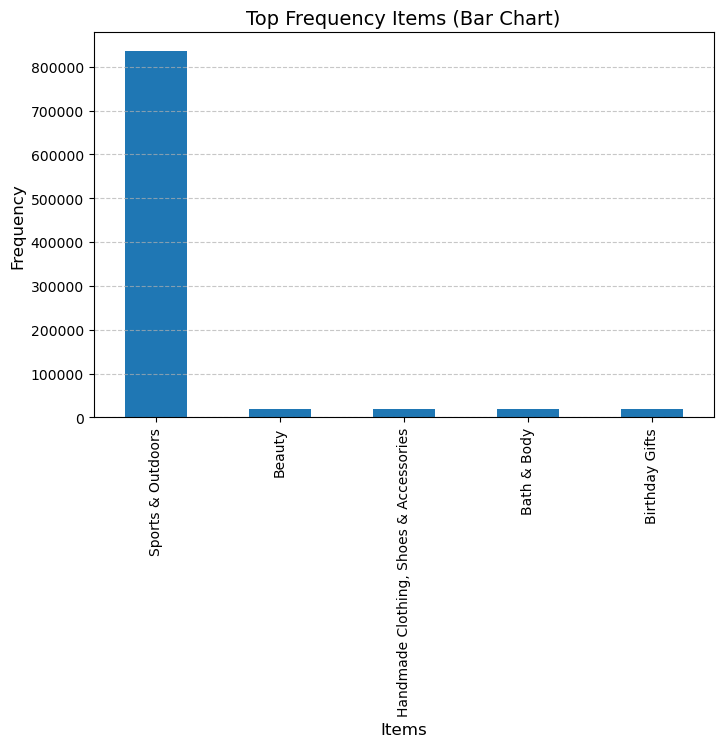

In [10]:
import matplotlib.pyplot as plt

frequency_table.plot(kind='bar', figsize=(8, 5))
plt.title("Top Frequency Items (Bar Chart)", fontsize=14)
plt.xlabel("Items", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


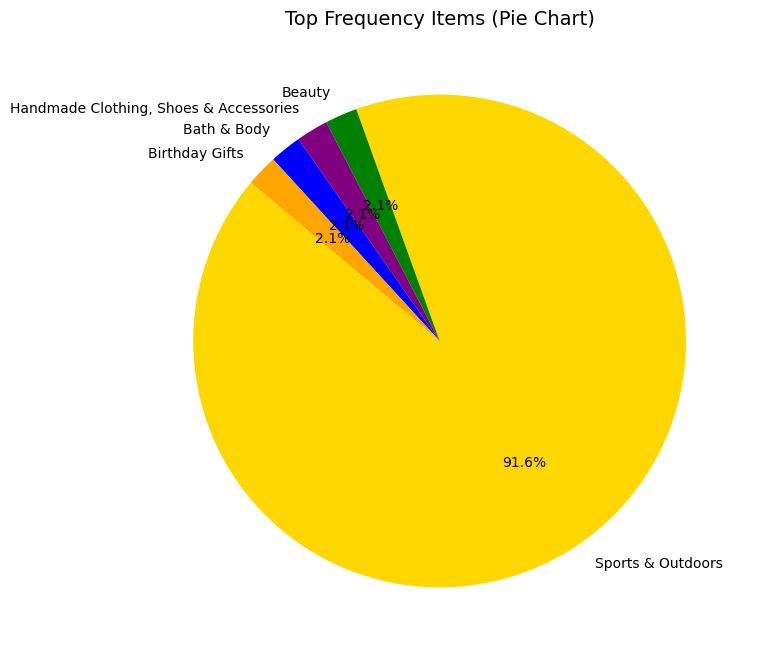

In [11]:
plt.figure(figsize=(8, 8))
top5.plot.pie(autopct='%1.1f%%', startangle=140, colors=['gold', 'green', 'purple', 'blue', 'orange'])
plt.title("Top Frequency Items (Pie Chart)", fontsize=14)
plt.ylabel('')  # Remove the default ylabel
plt.show()

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

    Calculate the mean, median, and mode for the price of products.
    What's the average price point of products listed? How does this compare with the most common price point (mode)?

Measures of Dispersion:

    Determine the variance, standard deviation, range, and interquartile range for product price.
    How varied are the product prices? Are there any indicators of a significant spread in prices?

Visualizations:

    Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
    Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing

In [54]:
mean = df['price'].mean()    # Mean
median = df['price'].median()  # Median
mode = df['price'].mode()    # Mode (can have multiple values)

print("Mean in £:", mean)
print("Median in £:", median)
print("Mode in £:", mode.tolist())  # Convert mode to a list for better readability


Mean in £: 89.24380943923663
Median in £: 19.09
Mode in £: [9.99]


In [14]:
# average is around 89£ hovewer the more common price point is 9.99£

In [66]:
variance = df['price'].var()
std_dev = df['price'].std()  # Sample standard deviation
data_range = df['price'].max() - df['price'].min()
q1 = df['price'].quantile(0.25)  # 25th percentile
q3 = df['price'].quantile(0.75)  # 75th percentile
iqr = q3 - q1

In [68]:
print("Variance:", round(variance))
print("Standard Deviation:", std_dev)
print("Range:", data_range)
print("Interquartile Range (IQR):", iqr)


Variance: 119445
Standard Deviation: 345.60886175352226
Range: 100000.0
Interquartile Range (IQR): 36.0


In [20]:
# yes, since the renge of prices is 100000 the variance in prices is huge

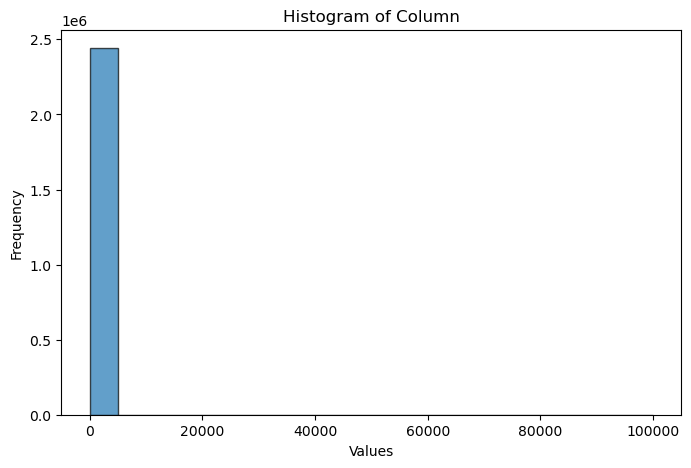

In [21]:
plt.figure(figsize=(8, 5))
bin_width = 20
df['price'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)

plt.title('Histogram of Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

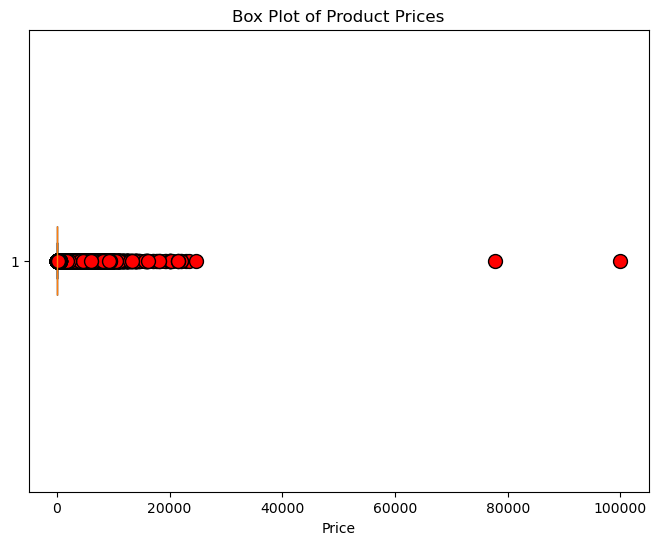

In [22]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'), 
            flierprops=dict(markerfacecolor='red', marker='o', markersize=10))

# Adding labels and title
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()


Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

    Calculate the mean, median, and mode for the rating of products.
    How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

    Determine the variance, standard deviation, and interquartile range for product rating.
    Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

    Calculate the skewness and kurtosis for the rating column.
    Are the ratings normally distributed, or do they lean towards higher or lower values?

Visualizations:

    Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [52]:
mean1 = df['stars'].mean()    # Mean
median1 = df['stars'].median()  # Median
mode1 = df['stars'].mode()    # Mode (can have multiple values)

print("Mean rating:", mean1)
print("Median rating:", median1)
print("Mode rating:", mode1.tolist()) 

Mean rating: 2.152836472966065
Median rating: 0.0
Mode rating: [0.0]


In [ ]:
# majory of reviews is 0 as most products dont have a rating

In [70]:
variance = df['stars'].var()
std_dev = df['stars'].std()  # Sample standard deviation
data_range = df['stars'].max() - df['price'].min()
q1 = df['stars'].quantile(0.25)  # 25th percentile
q3 = df['stars'].quantile(0.75)  # 75th percentile
iqr = q3 - q1

In [78]:
print("Variance:", round(variance, 2))
print("Standard Deviation:", round(std_dev, 2))
print("Range:", data_range)
print("Interquartile Range (IQR):", iqr)

Variance: 4.82
Standard Deviation: 2.19
Range: 5.0
Interquartile Range (IQR): 4.4


In [84]:
skewness = df['stars'].skew()
kurtosis = df['stars'].kurt()

print(f"Skewness of ratings: {skewness}")
print(f"Kurtosis of ratings: {kurtosis}")

Skewness of ratings: 0.08120735761080985
Kurtosis of ratings: -1.9260061280432985


In [ ]:
# Skewness: A positive value indicates the data is slightly right-skewed.
# Kurtosis: A negative value suggests the data has lighter tails compared to a normal distribution.
# Indicates that the data is relatively uniform, with less tendency for extreme outliers.
# Example: Heights of people in a population (which usually show less variation).

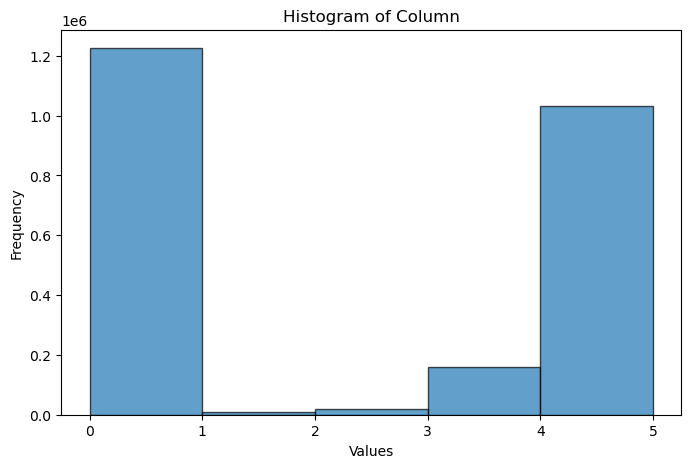

In [108]:
plt.figure(figsize=(8, 5))
df['stars'].plot(kind='hist', bins=5, edgecolor='black', alpha=0.7)

plt.title('Histogram of Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# most of the ratings are either 0 or above 4 - between 4 and 5 stars